# **Klasifikasi Jenis Kanker Payudara**

Tujuan dari Analisis ini yaitu untuk mengetahui atau untuk memprediksi apakah kita memiliki kanker payudara Ganas atau kanker payudara Jinak. Sehingga dapat membantu kita mencegah terjadinya kanker payudara sejak dini.

## Deskripsi Data

Data yang digunakan yaitu dataset Breast Cancer Wisconsin yang saya peroleh dari UCI

Dataset Breast Cancer Wisconsin dapat diakses pada link : https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

Tipe data yang yang digunakan pada dataset Breast Cancer Wisconsin adalah numerik dan kategorikal dengan jumlah 32 kolom dimana 30 kolom merupakan fitur, 1 kolom adalah ID dan 1 kolom merupakan label dengan 2 jenis kelas yaitu M (malignant)=Ganas berjumlah 212 dan B (benign) = Jinak berjumlah 357, sehingga total record data yaitu 569.


Fitur dihitung dari gambar digital aspirasi jarum halus (FNA) dari massa payudara. Mereka menggambarkan karakteristik inti sel yang ada pada gambar.
Dataset Wisconsin Breast Cancer yang bisa diakses di UCI adalah dataset yang digunakan dalam penelitian kanker payudara. Dataset ini memiliki 30 fitur yang digunakan untuk menggambarkan karakteristik sel-sel kanker payudara yang diukur dari gambaran histologi, yaitu penilaian jaringan biopsi.

Berikut adalah penjelasan singkat tentang setiap fitur yang ada dalam dataset:

1. radius_mean : Rata-rata jari-jari sel kanker(jarak dari pusat ke titik-titik pada keliling).
2. texture_mean : Rata-rata tekstur (perbedaan tingkat kekasaran) sel kanker(standart deviasi nilai skala abu-abu).
3. perimeter_mean : Rata-rata keliling sel kanker.
4. area_mean : Rata-rata luas area sel kanker.
5. smoothness_mean : Rata-rata kehalusan sel kanker.
6. compactness_mean : Rata-rata keliling^2 / luas - 1,0.
7. concavity_mean : Rata-rata cekungan sel kanker (tingkat keparahan bagian kontur yang cekung).
8. concave points_mean : Rata-rata titik cekungan sel kanker.
9. symmetry_mean : Rata-rata simetri sel kanker.
10. fractal_dimension_mean : Rata-rata dimensi fraktal sel kanker.
11. radius_se : Standard error dari jari-jari sel kanker.
12. texture_se : Standard error dari tekstur sel kanker.
13. perimeter_se : Standard error dari keliling sel kanker.
14. area_se : Standard error dari luas area sel kanker.
15. smoothness_se : Standard error dari kehalusan sel kanker.
16. compactness_se : Standard error dari kompak sel kanker.
17. concavity_se : Standard error dari cekungan sel kanker.
18. concave points_se : Standard errordari titik cekungan sel kanker.
19. symmetry_se : Standard error dari simetri sel kanker.
20. fractal_dimension_se : Standard error dari dimensi fraktal sel kanker.
21. radius_worst : Nilai rata-rata “terburuk” atau terbesar dari jari-jari sel kanker.
22. texture_worst : Nilai rata-rata “terburuk” atau terbesar dari tekstur sel kanker.
23. perimeter_worst : Nilai rata-rata “terburuk” atau terbesar dari keliling sel kanker.
24. area_worst : Nilai rata-rata “terburuk” atau terbesar dari luas area sel kanker.
25. smoothness_worst : Nilai rata-rata “terburuk” atau terbesar dari kehalusan sel kanker.
26. compactness_worst : Nilai rata-rata “terburuk” atau terbesar dari kompak sel kanker.
27. concavity_worst : Nilai rata-rata “terburuk” atau terbesar dari cekungan sel kanker.
28. concave points_worst : Nilai rata-rata “terburuk” atau terbesar dari titik cekungan sel kanker.
29. symmetry_worst : Nilai rata-rata “terburuk” atau terbesar dari simetri sel kanker.
30. fractal_dimension_worst : Nilai rata-rata “terburuk” atau terbesar dari dimensi fraktal sel kanker.

Mean, Standard Error dan Worst atau terbesar dari fitur-fitur ini dihitung untuk setiap gambar, sehingga menghasilkan 30 fitur.

**Penjelasan perhitungan yang digunakan pada fitur**

Terkait perhitungan mean (rata-rata), standard error (kesalahan standar), dan worst (terburuk) serta rumus dapat dijelaskan sebagai berikut:

1. Mean (Rata-rata):
Rata-rata adalah nilai tengah dari sejumlah angka. Dalam konteks data kanker payudara, kita bisa menghitung rata-rata dari fitur-fitur seperti `radius_mean`, `texture_mean`, `perimeter_mean`, dan lainnya. Rumusnya sederhana:

  $ \text{Mean} = \frac{{\sum \text{nilai fitur}}}{\text{jumlah sampel}}$

  Ini adalah jumlah dari semua nilai dalam sampel untuk fitur tertentu, kemudian dibagi dengan jumlah sampel untuk mendapatkan nilai rata-rata dari fitur tersebut.

2. Standard Error (Kesalahan Standar):
Kesalahan standar (SE) mengukur seberapa akurat rata-rata sampel merepresentasikan rata-rata populasi sebenarnya. Untuk menghitung SE, kita gunakan rumus:

  $SE = \frac{s}{\sqrt{n}}$

  di mana:
  * \( s \) adalah deviasi standar dari sampel.
  * \( n \) adalah jumlah sampel.

  Untuk menghitung SE dari fitur-fitur seperti `radius_se`, `texture_se`, dan lainnya, langkah pertama yaitu menghitung deviasi standar dari sampel-sampel yang diamati dan kemudian membaginya dengan akar kuadrat dari jumlah sampel untuk mendapatkan nilai kesalahan standar.

3. Worst (Terburuk):
Nilai terburuk (worst) adalah nilai maksimum dari sampel yang diamati untuk suatu fitur tertentu. Rumusnya sederhana:

  $\text{Worst} = \max(\text{nilai dari sampel})$

  Ini berarti mengambil nilai terbesar dari sampel tersebut sebagai representasi dari "nilai terburuk" dari fitur yang diamati.

  Jadi, ketika berbicara tentang fitur-fitur pada data kanker payudara, perhitungan mean (rata-rata) menghasilkan nilai tengah dari sampel, standard error (kesalahan standar) mengukur seberapa akurat nilai rata-rata tersebut merepresentasikan populasi, dan worst (terburuk) adalah nilai maksimum dari sampel yang diamati untuk setiap fitur.

## Eksplorasi Data

**Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math
from sklearn.preprocessing import LabelEncoder

**Import Dataset**

In [2]:
# Membaca data dari file CSV menggunakan pandas
df = pd.read_csv('https://raw.githubusercontent.com/dsty13/dataset/main/breast-cancer.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
df.shape #cek jumlah baris dan kolom

(569, 32)

In [4]:
df["diagnosis"].value_counts() #cek jumlah masing-masing kelas

B    357
M    212
Name: diagnosis, dtype: int64

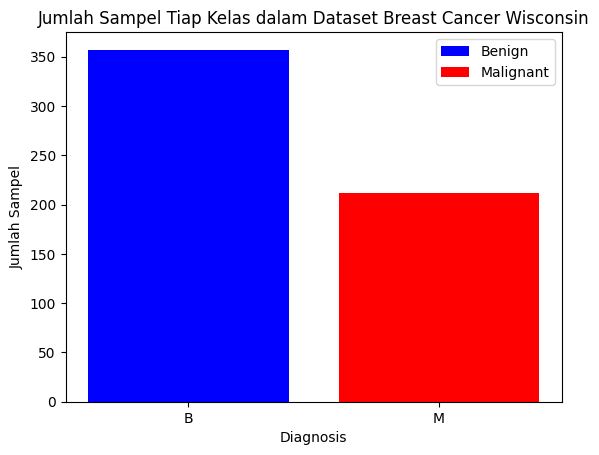

In [5]:
# Menghitung jumlah sampel dalam setiap kelas
class_count = df["diagnosis"].value_counts()

# Membuat plot bar untuk menampilkan jumlah sampel dalam tiap kelas
plt.bar(class_count.index, class_count.values, color=['blue', 'red'], label=['Benign', 'Malignant'])
plt.xlabel('Diagnosis')
plt.ylabel('Jumlah Sampel')
plt.title('Jumlah Sampel Tiap Kelas dalam Dataset Breast Cancer Wisconsin')
plt.legend()
plt.show()



In [6]:
df.columns #menampilkan nama-nama kolom

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

**Cek Missing Value**

In [7]:
# Cek apakah terdapat missing value di setiap kolom
missing_values = df.isnull().sum()

print(missing_values)

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


.isnull() adalah metode Pandas yang digunakan untuk menandai setiap sel dalam DataFrame yang memiliki nilai kosong atau missing value, yang mana mengembalikan DataFrame baru dengan seluruh nilai yang awalnya kosong atau NaN diisi dengan nilai True, sedangkan nilai yang ada diisi dengan False.

.sum() adalah metode Pandas yang akan menjumlahkan semua nilai boolean (True yang diinterpretasikan sebagai 1 dan False yang diinterpretasikan sebagai 0) dalam DataFrame yang dihasilkan oleh .isnull(). Dengan melakukan hal ini pada setiap kolom, sehingga mendapatkan jumlah nilai kosong atau missing value di setiap kolom DataFrame.

Dari hasil di atas diperoleh nilai untuk masing-masing kolom yaitu 0 artinya tidak ada missing value.

**Distribusi Data**

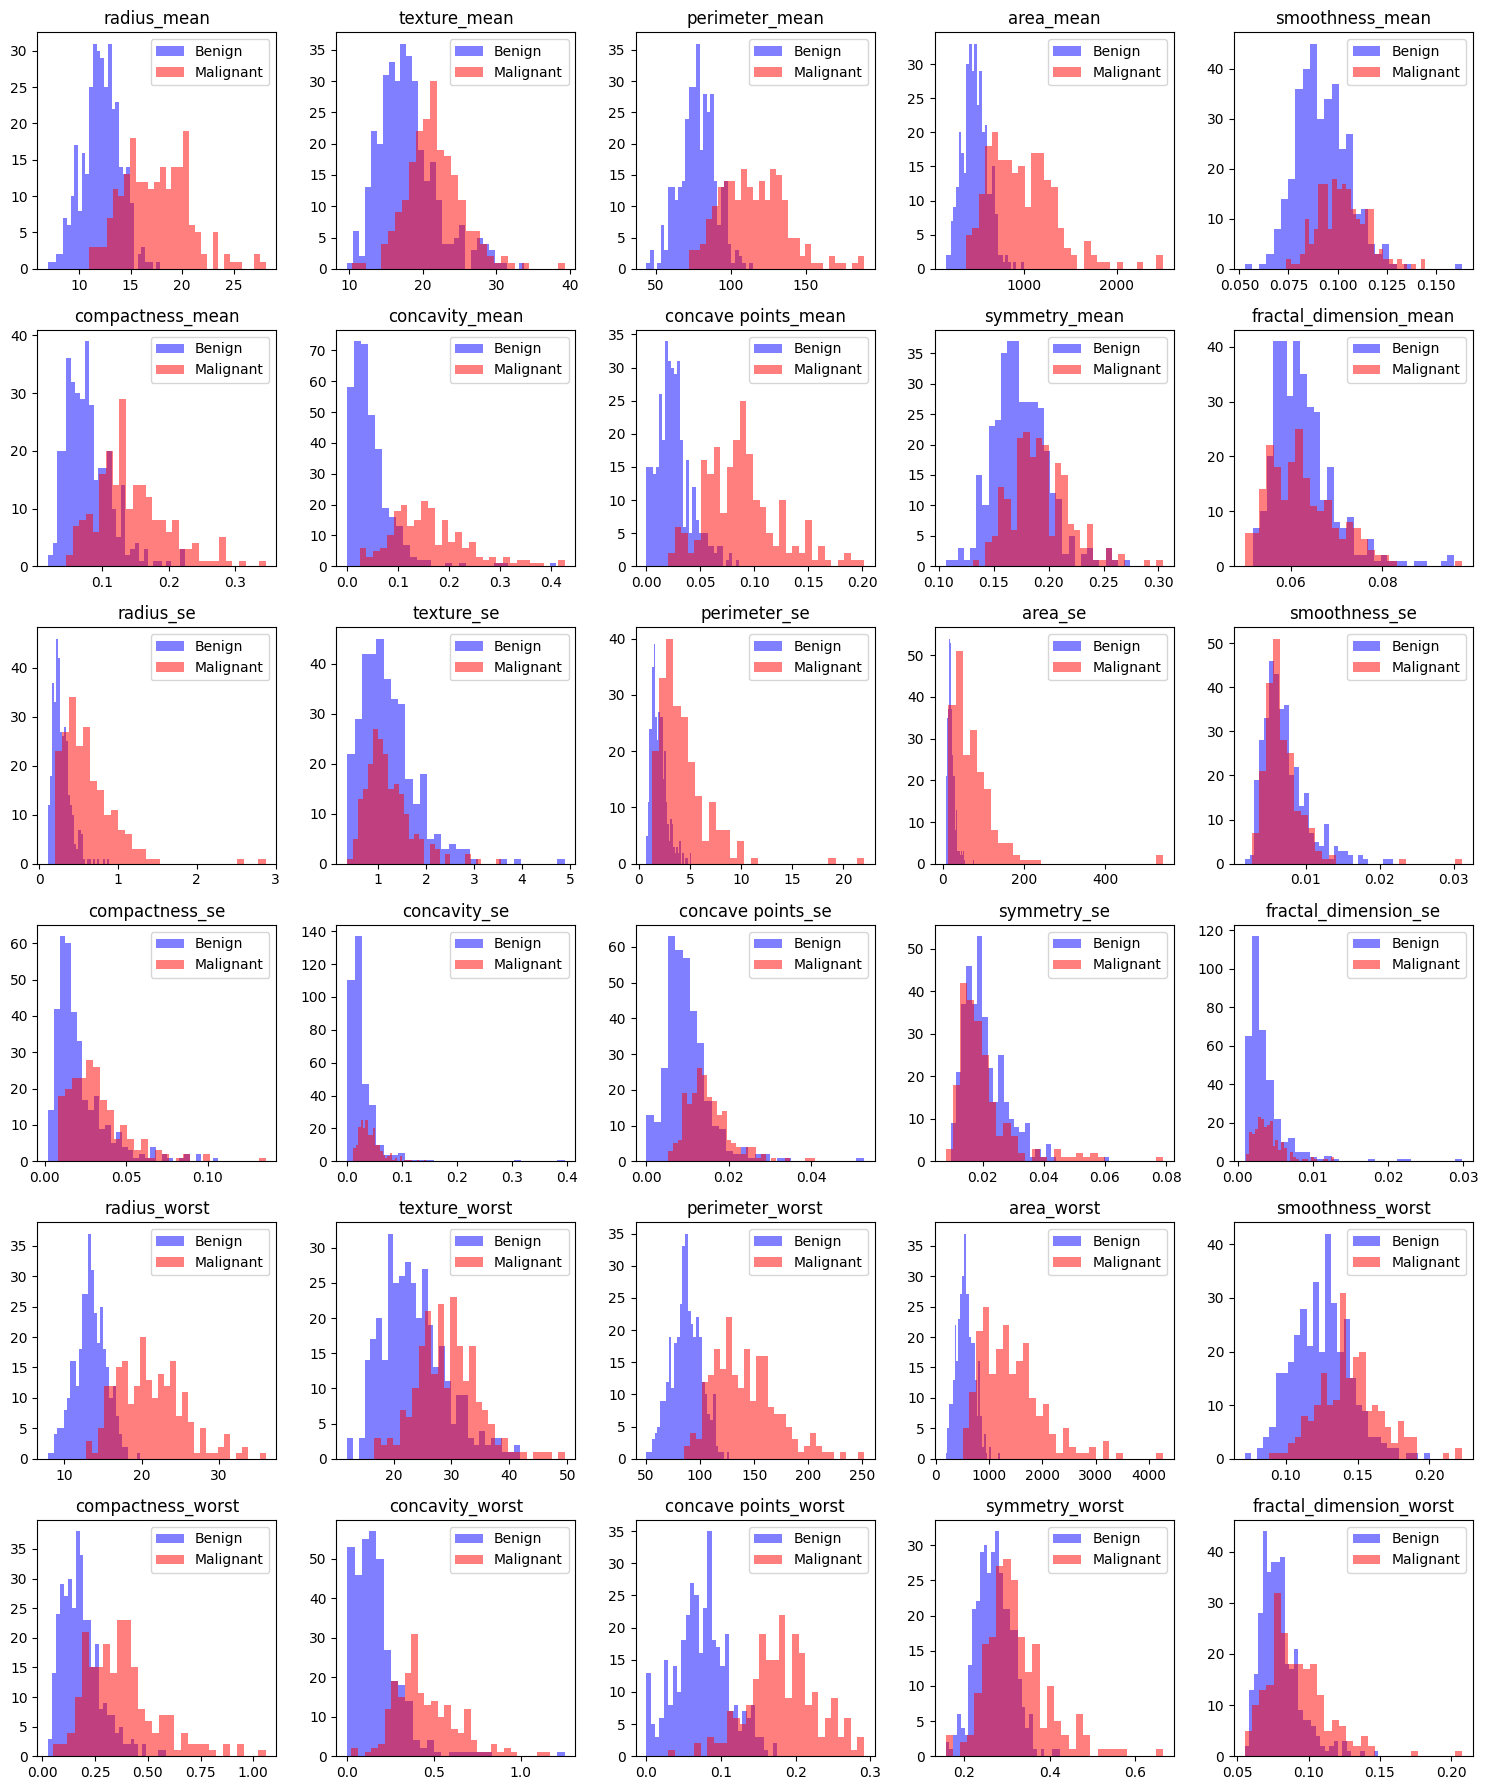

In [8]:
# Memuat dataset Breast Cancer Wisconsin dari URL
url = 'https://raw.githubusercontent.com/dsty13/dataset/main/breast-cancer.csv'
df = pd.read_csv(url)

# Mengelompokkan data berdasarkan diagnosis
benign = df[df['diagnosis'] == 'B']
malignant = df[df['diagnosis'] == 'M']

# Mengatur ukuran plot
num_columns = len(df.columns[2:])  # Menghitung jumlah kolom fitur saja
num_rows = (num_columns - 1) // 5 + 1  # Menyesuaikan jumlah baris berdasarkan jumlah kolom
plt.figure(figsize=(15, num_rows * 3))  # Menyesuaikan tinggi plot berdasarkan jumlah baris

# Visualisasi distribusi untuk setiap kolom fitur
for i, column in enumerate(df.columns[2:]):  # Mulai dari indeks ke-2 karena kolom target ada di indeks ke-1
    plt.subplot(num_rows, 5, i + 1)  # Membuat subplot
    plt.hist(benign[column], bins=30, alpha=0.5, label='Benign', color='blue')
    plt.hist(malignant[column], bins=30, alpha=0.5, label='Malignant', color='red')
    plt.title(column) # Memberi judul untuk setiap subplot sesuai nama kolom fitur
    plt.legend() #menampilkan legenda kelas

plt.tight_layout() #memastikan tata letak plot yang baik
plt.show() #menampilkan plot keseluruhan



- `plt.hist()` digunakan untuk membuat histogram dari data. `benign[column]` dan `malignant[column]` mewakili subset data 'Benign' dan 'Malignant' untuk kolom yang dipilih (`column`).

- `bins=30` menentukan jumlah bin (kelompok) yang akan digunakan dalam histogram. Semakin besar nilai ini, semakin halus histogramnya.

- `alpha=0.5` adalah nilai yang mengatur transparansi dari histogram. Dalam kasus ini, histogram memiliki transparansi 50% (nilai antara 0 dan 1).

- `label='Benign'` dan `label='Malignant'` memberikan label untuk masing-masing histogram yang akan digunakan dalam legenda.

- `color='green'` dan `color='red'` menentukan warna dari histogram yang dihasilkan untuk kelas 'Benign' dan 'Malignant' secara berturut-turut.

Histogram memiliki sumbu X dan Y:
- **Sumbu X**: Menunjukkan rentang nilai data (misalnya, rentang nilai dari fitur tertentu seperti radius, tekstur, dll.).
- **Sumbu Y**: Menunjukkan jumlah frekuensi atau jumlah data yang jatuh dalam setiap bin pada sumbu X.

Ketika histogram kelas 'Benign' ( yang ditampilkan dalam warna biru) dan histogram kelas 'Malignant' ( yang ditampilkan dalam warna merah) tumpang tindih:
- Hal ini menunjukkan adanya area di mana rentang nilai pada kedua kelas saling overlap atau ada nilai-nilai yang serupa di antara kelas 'Benign' dan 'Malignant'.
- Area tumpang tindih ini menunjukkan bahwa ada sebagian besar nilai yang serupa atau mungkin sulit untuk membedakan kelas berdasarkan fitur tersebut.

Dalam konteks analisis kanker payudara, jika terdapat tumpang tindih yang signifikan antara distribusi nilai fitur-fitur antara kelas 'Benign' dan 'Malignant', hal ini bisa menjadi petunjuk bahwa beberapa fitur mungkin tidak cukup kuat dalam membedakan kedua kelas tersebut.


## Preprocessing

### 1. Mengubah Kolom Kategorical Menjadi Numerik Menggunakan Label Encoder

Mengubah kolom kategorikal menjadi numerik menggunakan label encoder adalah suatu teknik dalam pemrosesan data yang sering digunakan dalam analisis data dan pembuatan model machine learning.

Label encoder akan menggantikan setiap nilai unik dalam kolom kategorikal dengan nilai numerik. Nilai-nilai numerik ini akan digunakan dalam analisis atau pemodelan selanjutnya.

In [9]:
kolom = ['diagnosis'] #inisialisasi kolom kategorikal yang akan di proses untuk dirubah menjadi numerik\bilangan bulat
encoder = LabelEncoder() #library scikit-learn yang digunakan untuk mengubah nilai-nilai dalam satu kolom menjadi nilai-nilai integer
#melakukan looping untuk memetakan nilai-nilai unik dalam kolom 'diagnosis' menjadi bilangan bulat mulai dari 0 hingga n-1
for k in kolom :
    df[k]=encoder.fit_transform(df[k])
#Hasil transformasi disimpan ke dalam kolom 'diagnosis' di DataFrame yang sama (df[k]), menimpa nilai-nilai asli dengan nilai-nilai yang telah diubah menjadi bilangan bulat.

In [10]:
# Menyimpan DataFrame hasil encoder ke dalam file CSV
df.drop('id', axis=1, inplace=True) #menghapus kolom id
df.to_csv('BreastCancer.csv', index=False) #menyimpan data ke dalam bentuk CSV
#Menapilkan data
data = pd.read_csv('https://raw.githubusercontent.com/dsty13/dataset/main/BreastCancer.csv')
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### 2. Normalisasi Menggunakan Z-Score

Normalisasi menggunakan Z-score atau biasa disebut Standarisasi yaitu merupakan teknik untuk mengubah nilai dalam data sehingga memiliki rata-rata 0 dan standar deviasi 1. Standarisasi membantu dalam mengubah distribusi data menjadi distribusi normal dan membandingkan variabel-variabel dengan unit yang berbeda.


Z-Score Scalling digunakan untuk mengubah nilai dalam data dengan mengukur sejauh mana nilai dari rata-rata dalam satuan standar deviasinya.
Z-score dihitung menggunakan rumus berikut:

$Z = \frac{(X - \mu)}{\sigma}$

 dimana :


*   (Z) : adalah Z-score,
*   (X) : adalah nilai titik data,
*   $(\mu)$ : adalah rata-rata populasi
*   $( \sigma)$ : adalah standar deviasi populasi


Z-score menyediakan cara untuk mengukur seberapa ekstrim atau umum suatu nilai dalam distribusi data. Interpretasi Z-score sebagai berikut:

- Jika Z-score positif, titik data berada di atas rata-rata populasi.
- Jika Z-score negatif, titik data berada di bawah rata-rata populasi.
- Nilai Z-score nol menunjukkan bahwa titik data sama dengan rata-rata populasi.



In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pickle import dump

**Melakukan standarisasi pada data train**

In [12]:
# Baca data dari file CSV
dt = pd.read_csv('https://raw.githubusercontent.com/dsty13/dataset/main/BreastCancer.csv')

# Pisahkan fitur (X) dan label (y)
X = dt.drop(['diagnosis'], axis=1)  # menghapus kolom label 'diagnosis' karena pada variabel X berisi fitur saja
y = dt['diagnosis'] #inisialisasi kolom label 'diagnosis'

# split data into train and test sets
X_train,X_test,y_train, y_test= train_test_split(X, y, random_state=1, test_size=0.2)

In [13]:
# mendefinisikan scaler
scaler = StandardScaler()
# menghitung rata-rata dan standard deviasi tiap fitur (menggunakan rumus Z-score)
scaler.fit(X_train)
# Transformasi nilai-nilai dari setiap fitur yang dihitung sebelumnya. Hasilnya adalah data latih dan data uji yang telah diskalakan.
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# save the scaler
dump(scaler, open('scaler_BC.pkl', 'wb'))

In [15]:
import pickle
with open('scaler_BC.pkl', 'rb') as standarisasi:
    loadscal= pickle.load(standarisasi)

### 3. Reduksi Dimensi menggunakan PCA

Principal Component Analysis (PCA) adalah suatu metode statistik yang digunakan untuk mengidentifikasi pola dalam data multivariat dengan mereduksi dimensi variabel. PCA mencoba untuk mengekspresikan data dalam bentuk kombinasi linear dari variabel-variabel yang ada sehingga menjadi dimensi baru, yang disebut principal components dimana menggambarkan variasi data dengan baik. Berikut adalah rumus PCA dan penjelasannya:

1. **Hitung Matriks Kovarian:**

   $ \text{Cov}(\mathbf{X}) = \frac{1}{n-1} \sum_{i=1}^{n} (\mathbf{X}_i - \bar{\mathbf{X}})(\mathbf{X}_i - \bar{\mathbf{X}})^T $

    di mana:


  *   $\mathbf{X}_i \text{ adalah vektor data poin ke-i,}$
  *   $\bar{\mathbf{X}} \text{ adalah vektor rata-rata dari semua data,}$
  *   $n \text{ adalah jumlah data poin.} $

2. **Hitung Nilai dan Vektor Eigen:** Menghitung nilai eigen (λ) dan vektor eigen (v) dari matriks kovarian.

   $ \text{Cov}(\mathbf{X})\mathbf{v} = \lambda\mathbf{v} $

3. **Pilih Principal Components:** Principal components dipilih berdasarkan nilai eigen tertinggi. Misalnya, jika kita ingin mereduksi dimensi menjadi k, kita memilih k vektor eigen dengan nilai eigen tertinggi.

4. **Transformasi Data:** Data asli (X) dapat diproyeksikan ke dalam ruang yang baru (Y) yang terdiri dari principal components yang dipilih.

   $ \mathbf{Y} = \mathbf{X} \mathbf{V} $

    di mana:

*   (Y) : matriks yang berisi data yang telah diproyeksikan ke dalam ruang principal components,
*   (X) : matriks data asli,
*   (V) : matriks yang berisi vektor eigen sebagai kolom-kolomnya.




In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
pca_train = pca.fit_transform(X_train_scaled)


pca = PCA(n_components=15): yaitu membuat objek PCA dengan menyertakan
parameter `n_components=15`. `n_components` adalah jumlah komponen utama (principal components) yang ingin dipertahankan setelah reduksi dimensi. Dalam hal ini akan digunakan 15 komponen utama.


pca_train = pca.fit_transform(X_train_scaled): dimana menggunakan objek PCA yang telah dibuat (`pca`) untuk melakukan reduksi dimensi pada data latih (`X_train_scaled`).`fit_transform` digunakan untuk menghitung komponen utama dan mengubah data latih ke dalam ruang dimensi yang baru.Kemudian Hasilnya disimpan dalam variabel `pca_train`.

data latih (`X_train_scaled`) sudah dinormalisasi sebelumnya (dengan menggunakan z-score normalization), dan PCA digunakan untuk menghasilkan representasi data yang lebih ringkas dengan hanya menggunakan 15 komponen utama.

In [17]:
pca_train.shape #untuk mengetahui tentang jumlah baris dan kolom dari data hasil PCA pada data uji.

(455, 15)

In [18]:
pca_test = pca.transform(X_test_scaled) #untuk mentransformasi data uji menjadi ruang fitur baru yang dibentuk oleh komponen-komponen PCA

In [19]:
pca_test.shape #untuk mengetahui tentang jumlah baris dan kolom dari data hasil transformasi PCA pada data latih.

(114, 15)

In [20]:
dump(pca, open('PCA_BC.pkl', 'wb')) #menyimpan pca

## Mencari Metode Machine Learning terbaik menggunakan Pycaret

PyCaret adalah sebuah library Python yang dirancang untuk memudahkan dan mempercepat proses pengembangan model machine learning. PyCaret menyediakan antarmuka yang mudah digunakan untuk melakukan berbagai tugas, termasuk eksplorasi data, pemilihan model, penyetelan parameter, evaluasi model, dan produksi model, semuanya dengan beberapa baris kode.

In [23]:
!pip install pycaret

Berikut merupakan code penggunaan pycaret dan penjelasannya :

In [24]:
from pycaret.classification import *

# Langkah 1: Baca data dari file CSV
dt = pd.read_csv('https://raw.githubusercontent.com/dsty13/dataset/main/BreastCancer.csv')
print(dt.columns)

# Langkah 2: Pilih kolom-kolom yang perlu dinormalisasi
kolom = ['radius_mean','texture_mean','perimeter_worst','perimeter_mean','area_mean','perimeter_se','area_se','radius_worst','texture_worst','area_worst']

# Langkah 3: Split data menjadi fitur (X) dan target (y)
X = dt.drop(columns=['diagnosis'])
y = dt['diagnosis']

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


**Pada Langkah 4** terdapat Fungsi setup() yang digunakan untuk menyiapkan lingkungan PyCaret dengan menyediakan dataset dan menentukan target serta beberapa konfigurasi lainnya. PyCaret secara otomatis akan melakukan beberapa langkah pra-pemrosesan data dan menampilkan informasi statistik dasar tentang dataset.

In [25]:
#Langkah 4: Inisialisasi ekperimen PyCaret
exp = setup(data=dt, target='diagnosis', normalize=True,train_size= 0.8, normalize_method='zscore',pca=True,pca_method='linear',pca_components=15, numeric_features=kolom)


,Description,Value
0,Session id,5431
1,Target,diagnosis
2,Target type,Binary
3,Original data shape,"(569, 31)"
4,Transformed data shape,"(569, 16)"
5,Transformed train set shape,"(455, 16)"
6,Transformed test set shape,"(114, 16)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


Adapun Inisialisasi Eksperimen PyCaret pada code diatas meliputi:

data: Menentukan dataset.

target: Menentukan kolom target.

normalize: Normalisasi fitur diaktifkan.

train_size : Menentukan jumlah data latih.

normalize_method: Metode normalisasi, dalam hal ini menggunakan Z-score normalization.

pca: PCA (Principal Component Analysis) diaktifkan.

pca_method: Metode PCA, dalam hal ini menggunakan metode linear.

pca_components: Jumlah komponen PCA yang akan dihasilkan (yaitu 15 komponen).

numeric_features: Kolom-kolom yang akan dinormalisasi.

**Pada Langkah 5** terdapat fungsi compare_models yang secara cepat membandingkan performa beberapa model machine learning tanpa perlu menulis banyak kode dan memberikan model terbaik berdasarkan metrik kinerja yang dihasilkan.

best_model: Ini adalah model terbaik yang dihasilkan dari fungsi compare_models dan kemudian dicetak.

In [34]:
# Langkah 5:Bandingkan model dan cari yang terbaik
best_model = compare_models()



,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9802,0.9941,0.9529,0.9938,0.9723,0.9570,0.9581,0.8840
lightgbm,Light Gradient Boosting Machine,0.9692,0.9924,0.9412,0.9773,0.9575,0.9334,0.9355,0.1990
qda,Quadratic Discriminant Analysis,0.9649,0.9924,0.9529,0.9552,0.9534,0.9253,0.9261,0.0530
knn,K Neighbors Classifier,0.9648,0.9871,0.9353,0.9695,0.9519,0.9241,0.9247,0.0670
ridge,Ridge Classifier,0.9627,0.0000,0.9059,0.9933,0.9470,0.9183,0.9213,0.0500
lda,Linear Discriminant Analysis,0.9627,0.9924,0.9059,0.9933,0.9470,0.9183,0.9213,0.1030
xgboost,Extreme Gradient Boosting,0.9626,0.9903,0.9412,0.9597,0.9491,0.9196,0.9211,0.1070
et,Extra Trees Classifier,0.9604,0.9918,0.9235,0.9715,0.9457,0.9146,0.9167,0.2340
svm,SVM - Linear Kernel,0.9561,0.0000,0.9412,0.9430,0.9411,0.9061,0.9073,0.0530
ada,Ada Boost Classifier,0.9560,0.9895,0.9353,0.9474,0.9400,0.9053,0.9069,0.2630


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Dari hasil pycaret diatas didapatkan **best_model** terbaik yaitu pada metode **Logistic Regression**.

**Simpan Model terbaik dari hasil Pycaret**

Model terbaik yang didapat dari hasil compare_models pada Pycaret maka akan dilakukan simpan model yang nantinya digunakan untuk klasifikasi Jenis Kanker Payudara.

 Dengan menggunakan fungsi create_model, maka dapat membuat dan mengatur model machine learning. PyCaret akan secara otomatis mengatur parameter untuk meningkatkan performa model.

 Fungsi save_model digunakan untuk menyimpan model ke dalam suatu file.

 Fungsi load_model digunakan untuk memuat kembali model yang telah disimpan sebelumnya.

In [27]:
best_model = create_model('lr')
save_model(best_model,'lr_BC')
loaded_model = load_model('lr_BC')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9565,0.9838,0.8824,1.0000,0.9375,0.9044,0.9085
2,0.9783,0.9655,0.9412,1.0000,0.9697,0.9528,0.9538
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9783,0.9980,0.9412,1.0000,0.9697,0.9528,0.9538
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9333,0.9937,0.8824,0.9375,0.9091,0.8565,0.8575
8,0.9556,1.0000,0.8824,1.0000,0.9375,0.9032,0.9075


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded


## Klasifikasi Menggunakan Logistic Regression

**Logistic Regression** adalah salah satu metode regresi yang umum digunakan untuk memodelkan hubungan antara variabel dependen biner (dua kelas) dengan satu atau lebih variabel independen atau prediktor. Meskipun disebut "regresi," logistic regression sebenarnya digunakan untuk tugas klasifikasi, khususnya klasifikasi biner.

Berikut adalah beberapa konsep dan karakteristik utama terkait dengan Logistic Regression:

1. **Fungsi Sigmoid (Logistic Function)**:

   $\sigma(z) = \frac{1}{1 + e^{-z}}$

   Di sini, $\sigma(z)$ adalah probabilitas bahwa sampel masuk ke dalam kelas 1 (positif), dan (z) adalah kombinasi linear dari variabel independen dan parameter model.

2. **Kombinasi Linear**:

   $z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n$
   
   Variabel (x) adalah nilai-nilai fitur, $(\beta_0, \beta_1, \beta_2, \ldots, \beta_n)$ adalah bobot yang dipelajari oleh model, dan (z) adalah kombinasi linear dari fitur dengan bobot dan intercept.

3. **Probabilitas Klasifikasi**:

   Setelah mendapatkan nilai (z), nilai ini dimasukkan ke dalam fungsi sigmoid untuk mendapatkan probabilitas kelas:

   $\text{Probabilitas}(y = 1 | x) = \frac{1}{1 + e^{-z}}$

   $\text{Probabilitas}(y = 0 | x) = 1 - \frac{1}{1 + e^{-z}}$

   - Probabilitas bahwa sampel termasuk dalam kelas 1 (positif) adalah $\text{Probabilitas}(y = 1 | x)$.
   - Probabilitas bahwa sampel termasuk dalam kelas 0 (negatif) adalah $1 - \text{Probabilitas}(y = 1 | x)$.

4. **Keputusan Klasifikasi**:

   Setelah mendapatkan probabilitas, kita menetapkan batas ambang (biasanya 0.5). Jika $\text{Probabilitas}(y = 1 | x)$ lebih besar dari batas ambang, sampel diprediksi sebagai kelas 1. Jika lebih kecil, sampel diprediksi sebagai kelas 0.

Rumus ini menyajikan cara Logistic Regression memodelkan probabilitas bahwa suatu sampel masuk ke dalam kelas tertentu berdasarkan kombinasi linear dari fitur-fitur. Dengan mengubah batas ambang, kita dapat menyesuaikan sensitivitas dan spesifisitas dari model klasifikasi.



**Visualisasi Fungsi Sigmoid**

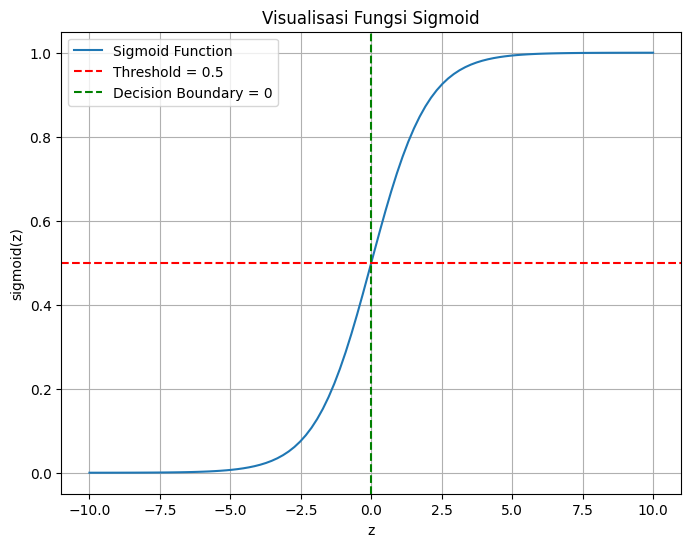

In [28]:
# Fungsi sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Menghasilkan rentang nilai z
z = np.linspace(-10, 10, 100)
# Hitung nilai sigmoid dari z
sigmoid_z = sigmoid(z)

# Visualisasi kurva sigmoid
plt.figure(figsize=(8, 6))
plt.plot(z, sigmoid_z, label='Sigmoid Function')
plt.xlabel('z')
plt.ylabel('sigmoid(z)')
plt.title('Visualisasi Fungsi Sigmoid')
plt.axhline(y=0.5, color='r', linestyle='--', label='Threshold = 0.5')
plt.axvline(x=0, color='g', linestyle='--', label='Decision Boundary = 0')
plt.legend()
plt.grid(True)
plt.show()


Gambar diatas merupakan visualisasi kurva sigmoid yang menunjukkan bagaimana fungsi tersebut berperilaku sebagai fungsi pemetaan dari nilai z ke probabilitas kelas. Garis putus-putus pada y = 0.5 adalah ambang batas yang sering digunakan untuk memprediksi kelas (Misalnya, jika threshold yang digunakan adalah 0.5, maka probabilitas yang lebih besar dari 0.5 akan dianggap sebagai kelas satu, sementara probabilitas yang kurang dari 0.5 akan dianggap sebagai kelas lainnya), dan garis putus-putus pada x = 0 adalah batas keputusan (decision boundary) dalam model regresi logistik.

**Code Logistik Regression**

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [30]:
from logging import LogRecord
# Inisialisasi model Logistic Regression
lr_model = LogisticRegression()
# Melatih model pada data latih
lr_model.fit(pca_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
# Membuat prediksi pada data uji
y_pred = lr_model.predict(pca_test)

In [32]:
# Evaluasi performa model
accuracy = accuracy_score(y_test, y_pred)

# Menampilkan hasil
print(f'Accuracy: {accuracy}')


Accuracy: 0.9824561403508771


In [33]:
dump(lr_model,open('BC_lr.pkl','wb'))

## Uji Coba Menggunakan Streamlit

 Link streamlit dapat diakses pada : [Klasifikasi Breast Cancer](https://breastcancer-clasification.streamlit.app/)